In [ ]:
!pip install opencv-python-headless


In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [ ]:
def create_image(width, height, horizontal_start, horizontal_end, vertical_start, vertical_end, diagonal_slope_1, diagonal_width_1, diagonal_shift_1, diagonal_slope_2, diagonal_width_2, diagonal_shift_2):
    # Create a new image with black background
    img = Image.new('RGB', (width, height), color='black')
    draw = ImageDraw.Draw(img)

    # Draw white horizontal rectangle
    draw.rectangle([(horizontal_start[0], horizontal_start[1]), (horizontal_end[0], horizontal_end[1])], fill='white')

    # Draw white vertical rectangle
    draw.rectangle([(vertical_start[0], vertical_start[1]), (vertical_end[0], vertical_end[1])], fill='white')

    # Calculate end points of diagonal line 1
    diagonal_end_x_1 = width
    diagonal_end_y_1 = int(diagonal_slope_1 * (width - diagonal_width_1) + vertical_start[1] + diagonal_shift_1)

    # Draw white diagonal line 1
    draw.line([(0, vertical_start[1] + diagonal_shift_1), (diagonal_end_x_1, diagonal_end_y_1)], fill='white', width=diagonal_width_1)

    # Calculate end points of diagonal line 2
    diagonal_end_x_2 = width
    diagonal_end_y_2 = int(diagonal_slope_2 * (width - diagonal_width_2) + vertical_start[1] + diagonal_shift_2)

    # Draw white diagonal line 2
    draw.line([(0, vertical_start[1] + diagonal_shift_2), (diagonal_end_x_2, diagonal_end_y_2)], fill='white', width=diagonal_width_2)

    return img

In [ ]:
# Define image dimensions
width = 250
height = 250

# Define coordinates for horizontal and vertical rectangles
horizontal_start = (37, 50)
horizontal_end = (213, 75)
vertical_start = (150, 33)
vertical_end = (195, 200)

# Define parameters for diagonal lines
diagonal_slope_1 = 1  # Adjust slope for diagonal line 1
diagonal_width_1 = 7  # Adjust width for diagonal line 1
diagonal_shift_1 = -32  # Adjust shift for diagonal line 1

diagonal_slope_2 = 1.35  # Adjust slope for diagonal line 2
diagonal_width_2 = 1  # Adjust width for diagonal line 2
diagonal_shift_2 = 25  # Adjust shift for diagonal line 2

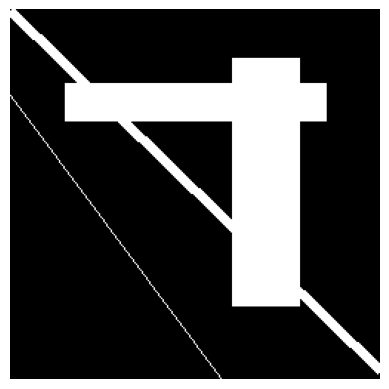

In [ ]:
# Create the image
image = create_image(width, height, horizontal_start, horizontal_end, vertical_start, vertical_end,
                     diagonal_slope_1, diagonal_width_1, diagonal_shift_1,
                     diagonal_slope_2, diagonal_width_2, diagonal_shift_2)

# Convert PIL image to numpy array for display
image_np = np.array(image)

# Display the image
plt.imshow(image_np)
plt.axis('off')  # Hide axis
plt.show()

# Save the image
image.save('image_with_custom_rectangles_and_diagonals.png')


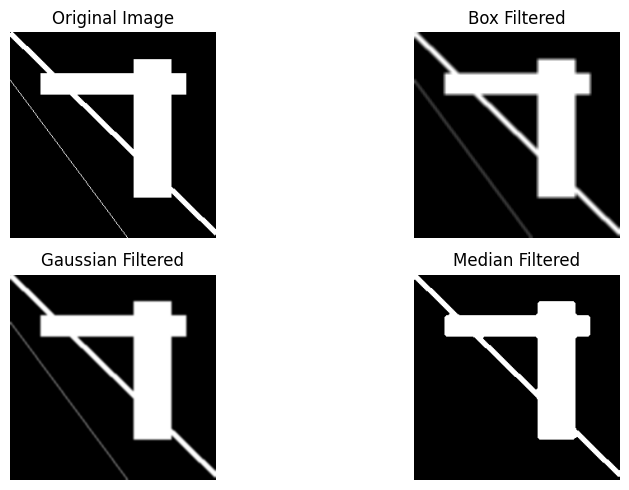

In [ ]:
# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

# Apply Box filter
box_filtered = cv2.boxFilter(image_np, -1, (5, 5))
plt.subplot(2, 2, 2)
plt.imshow(box_filtered)
plt.title('Box Filtered')
plt.axis('off')

# Apply Gaussian filter with unity standard deviation
gaussian_filtered = cv2.GaussianBlur(image_np, (5, 5), 0)
plt.subplot(2, 2, 3)
plt.imshow(gaussian_filtered)
plt.title('Gaussian Filtered')
plt.axis('off')

# Apply Median filter
median_filtered = cv2.medianBlur(image_np, 5)
plt.subplot(2, 2, 4)
plt.imshow(median_filtered)
plt.title('Median Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()

1.   **Box Filtered Image:**

> * The Box filter applies a simple averaging operation to each pixel in the image using a square kernel.
* It tends to blur the image, resulting in a smoother appearance.
* While it effectively removes noise, it may also blur edges and fine details in the image.





2.   **Gaussian Filtered Image:**

> * The Gaussian filter applies a weighted average to each pixel using a Gaussian kernel.
* It provides a smoother result compared to the Box filter.
* Gaussian filtering preserves edges better than the Box filter while still reducing noise.




3.   **Median Filtered Image:**

> * The Median filter replaces each pixel value with the median value in its neighborhood.
* It is effective in removing salt-and-pepper noise without blurring edges.
* The Median filter preserves edges well and maintains fine details in the image.

